In [3]:
import pandas as pd

In [ ]:
pd.

In [1]:
import tensorflow as tf

In [84]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1967818451253187508
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2916574823
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7860852907153679658
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [86]:
np.random.seed(0)

In [87]:
raw = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [88]:
from random import randint
raw.iloc[randint(1,len(raw))]

customerID                       8338-QIUNR
gender                                 Male
SeniorCitizen                             0
Partner                                 Yes
Dependents                              Yes
tenure                                   72
PhoneService                            Yes
MultipleLines                           Yes
InternetService                         DSL
OnlineSecurity                          Yes
OnlineBackup                             No
DeviceProtection                        Yes
TechSupport                             Yes
StreamingTV                              No
StreamingMovies                          No
Contract                           Two year
PaperlessBilling                        Yes
PaymentMethod       Credit card (automatic)
MonthlyCharges                         66.5
TotalCharges                         4811.6
Churn                                    No
Name: 699, dtype: object

In [89]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
raw.TotalCharges = pd.to_numeric(raw.TotalCharges, errors='coerce')

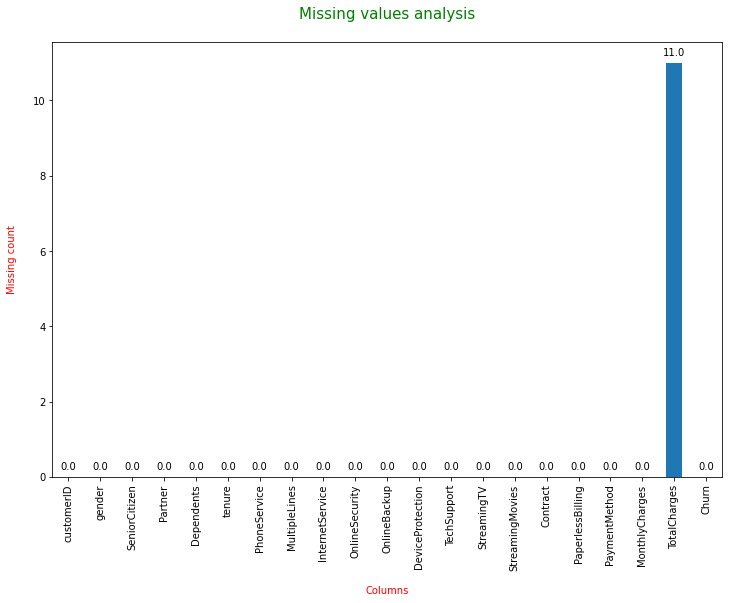

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

freq_series = raw.isnull().sum()

#x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0,
#            121740.0, 123980.0, 126220.0, 128460.0, 130700.0]

# Plot the figure.

plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Missing values analysis\n',color='green',fontsize=15)
ax.set_xlabel('\nColumns',color='red')
ax.set_ylabel('Missing count\n',color='red')
#ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

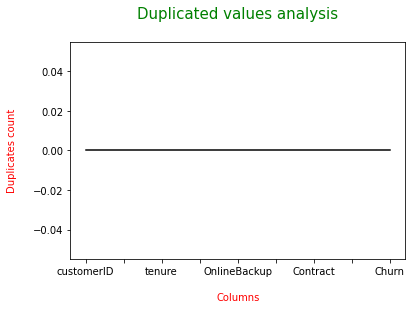

In [92]:
raw[raw.duplicated()].sum().plot(kind='line',color='black');
plt.xlabel('\nColumns',color='red')
plt.ylabel('Duplicates count\n',color='red')
plt.title('Duplicated values analysis\n',color='green',fontsize=15)
plt.show()

In [93]:
raw.drop('customerID',axis=1,inplace=True)

In [94]:
raw.dropna(inplace=True)

In [95]:
raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


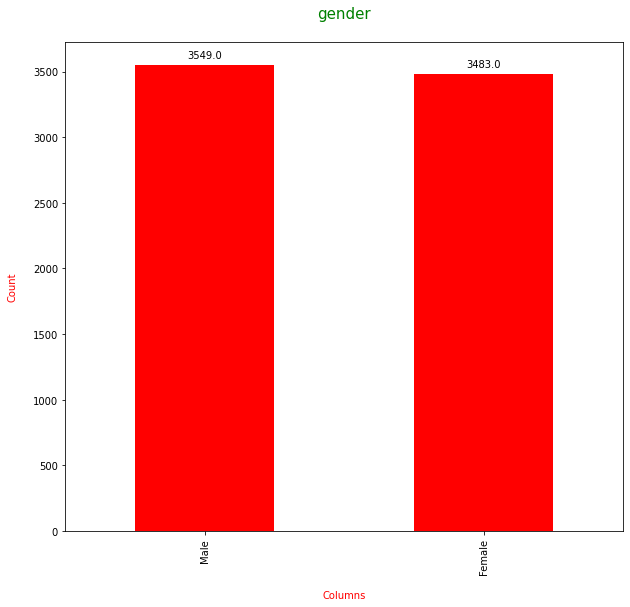


----------------------------------------------------------------------------------------------------


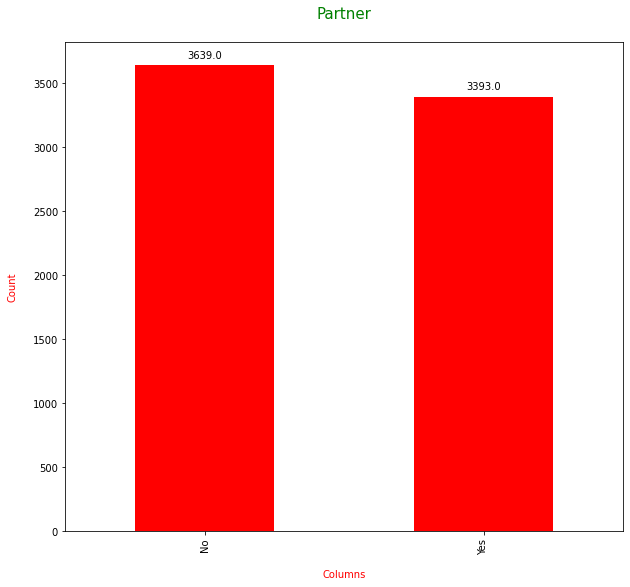


----------------------------------------------------------------------------------------------------


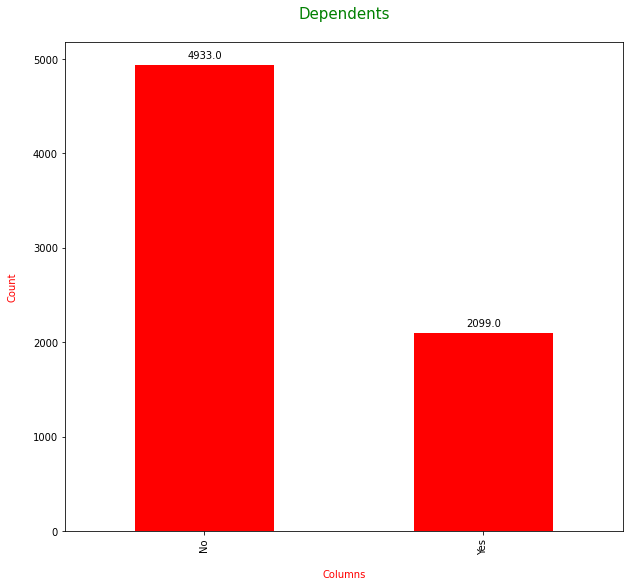


----------------------------------------------------------------------------------------------------


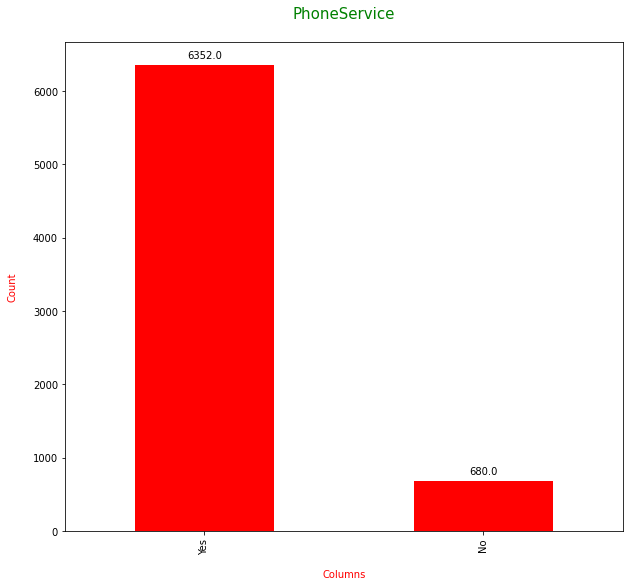


----------------------------------------------------------------------------------------------------


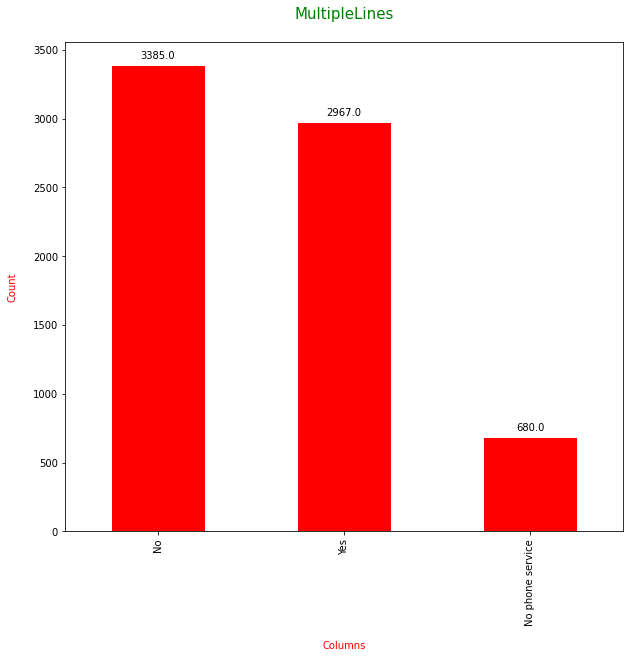


----------------------------------------------------------------------------------------------------


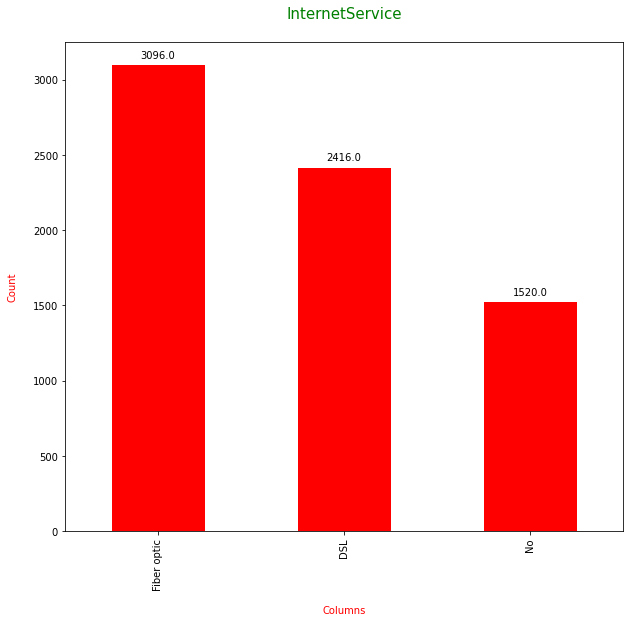


----------------------------------------------------------------------------------------------------


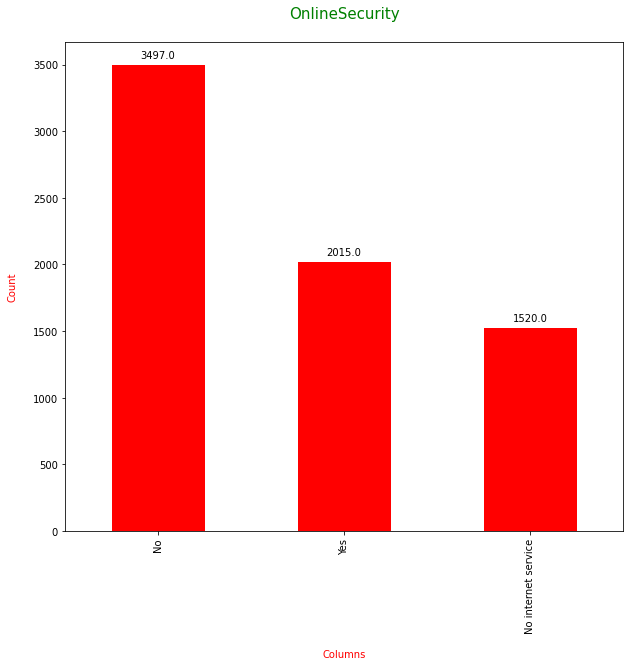


----------------------------------------------------------------------------------------------------


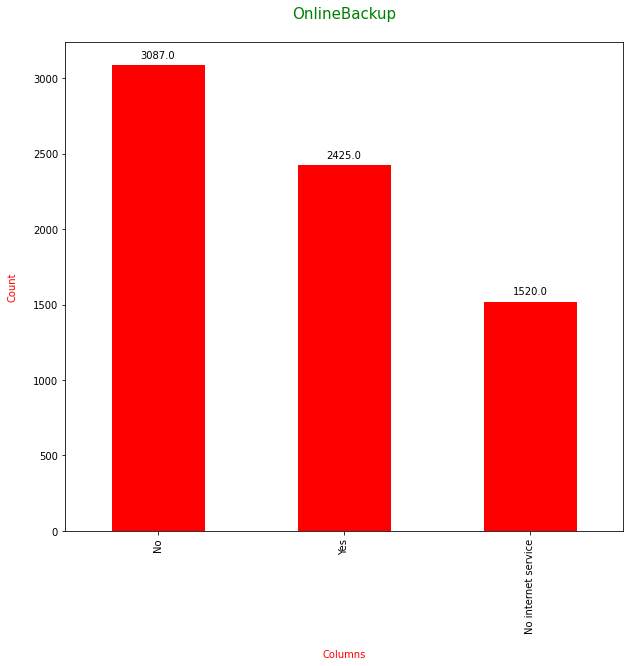


----------------------------------------------------------------------------------------------------


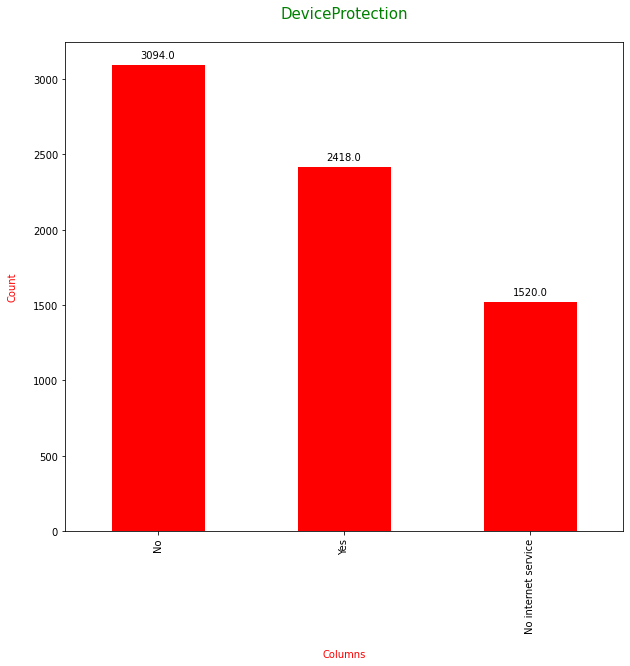


----------------------------------------------------------------------------------------------------


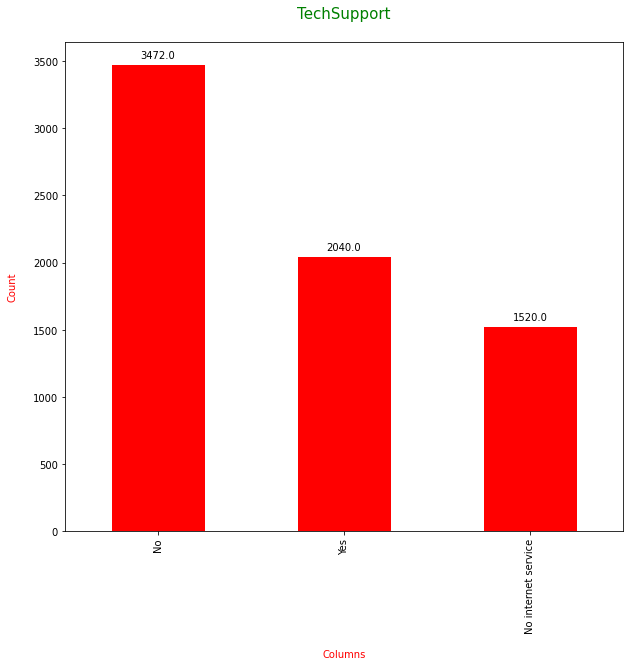


----------------------------------------------------------------------------------------------------


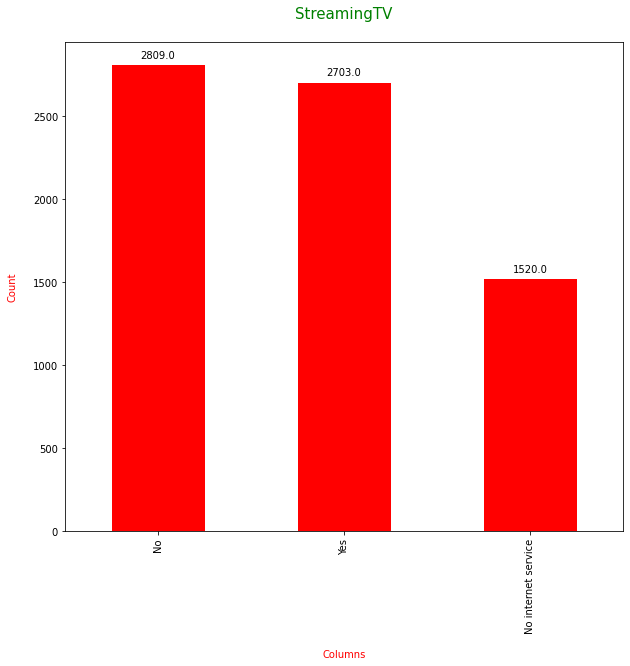


----------------------------------------------------------------------------------------------------


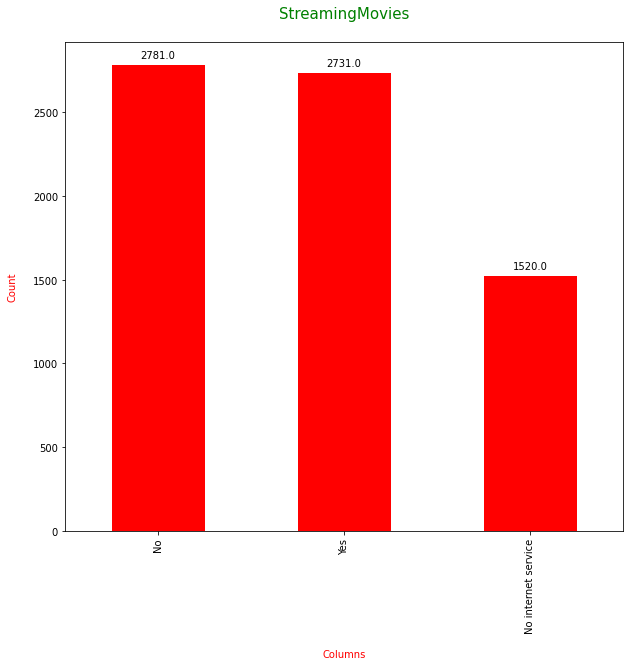


----------------------------------------------------------------------------------------------------


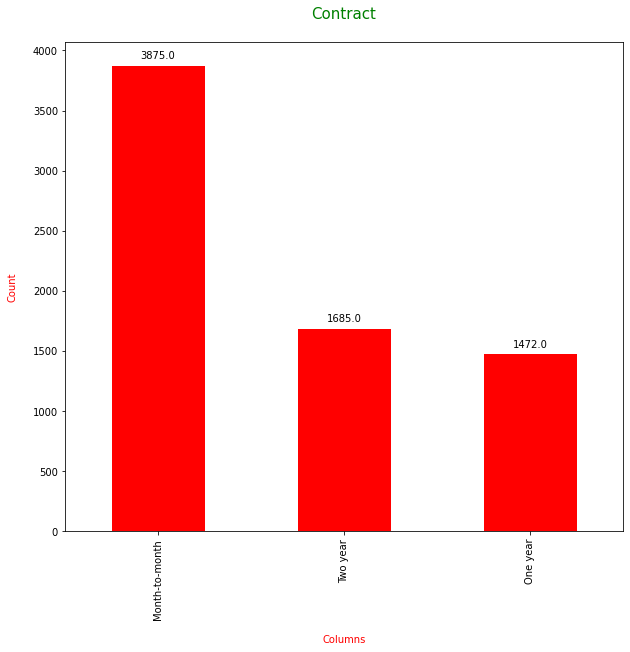


----------------------------------------------------------------------------------------------------


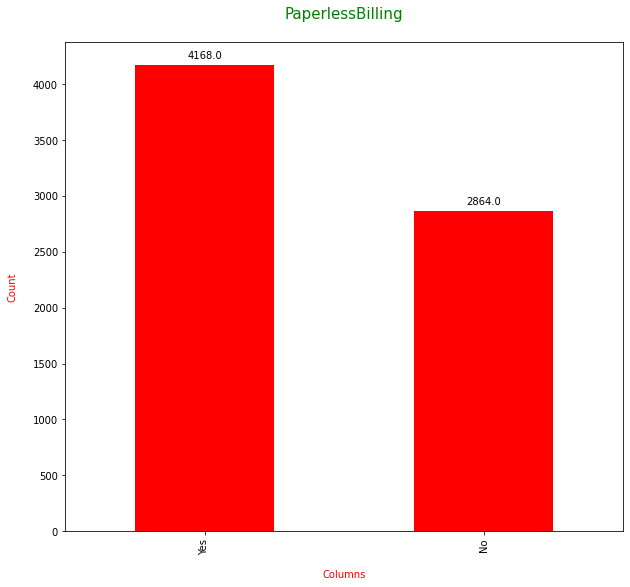


----------------------------------------------------------------------------------------------------


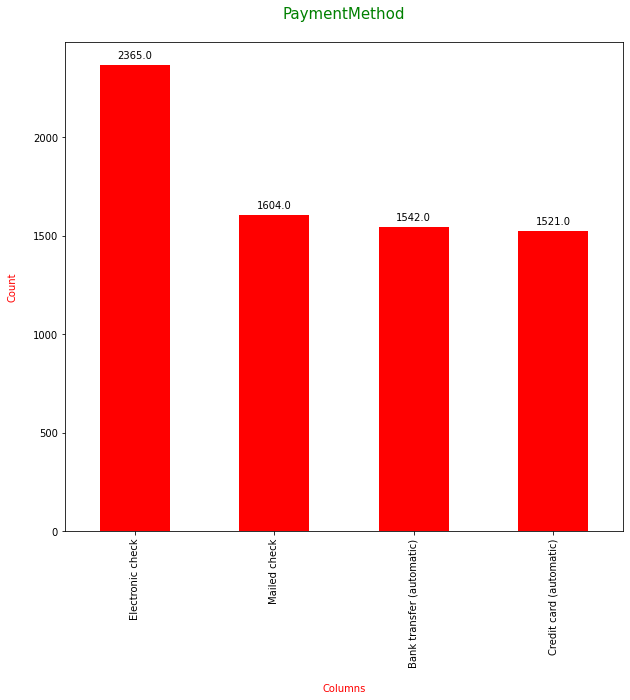


----------------------------------------------------------------------------------------------------


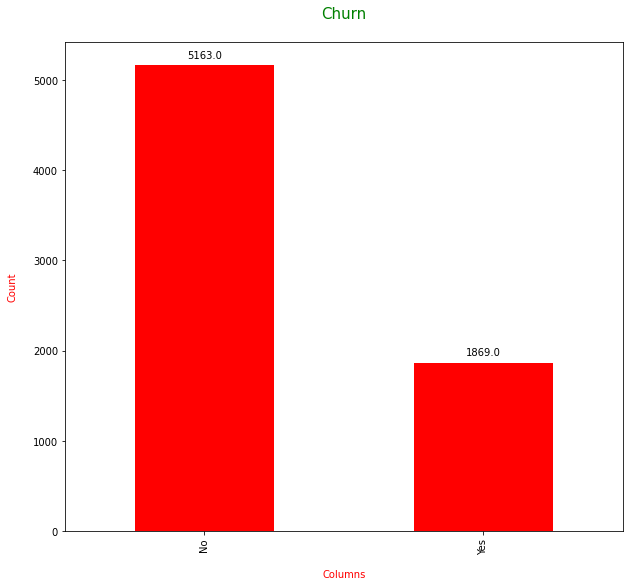


----------------------------------------------------------------------------------------------------


In [96]:
for k,v in raw.dtypes[raw.dtypes == 'object'].items():
        ax = raw[k].value_counts().plot(kind='bar',color='red',figsize=(10,9))
        add_value_labels(ax)
        plt.xlabel('\nColumns',color='red')
        plt.ylabel('Count\n',color='red')
        plt.title(f'{k}\n',color='green',fontsize=15)
        plt.show()
        print()
        print('-'*100)

In [97]:
encode=[]
for obj in raw.columns:
    if raw[obj].dtypes == 'object':
        encode.append(obj)

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for en in encode:
    raw[en]=le.fit_transform(raw[en])

In [99]:
raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [100]:
learning_onehot=raw

In [101]:
from scipy import stats
for x in range (100):
    raw_clean = learning_onehot[(np.abs(stats.zscore(learning_onehot)) < 3).all(axis=1)]

raw_clean = raw_clean.reset_index(drop=True)
raw_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
1,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
2,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
3,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
4,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
6348,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
6349,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
6350,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [102]:
raw_clean.Churn.value_counts()

0    4653
1    1699
Name: Churn, dtype: int64

In [103]:
one = raw_clean[raw_clean['Churn'] == 1]
one.shape

(1699, 20)

In [104]:
zero = raw_clean[raw_clean['Churn'] == 0]
zero.shape

(4653, 20)

In [105]:
zeros = zero.sample(len(one),random_state=71)
data = pd.concat([one,zeros])
data["Churn"].value_counts()

1    1699
0    1699
Name: Churn, dtype: int64

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
#standardscaler gives zero accuracy
#scaler=StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.351324,0.010305,1.0
1,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.519740,0.015324,1.0
2,0.0,0.0,0.0,0.0,0.098592,0.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.809095,0.092506,1.0
3,0.0,0.0,1.0,0.0,0.380282,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.860570,0.349321,1.0
4,1.0,0.0,0.0,0.0,0.676056,0.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.849575,0.578984,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.0,0.0,1.0,0.0,0.422535,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.666667,0.452774,0.218314,0.0
3394,0.0,0.0,1.0,0.0,0.126761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.333333,0.490755,0.073195,0.0
3395,1.0,0.0,1.0,1.0,0.732394,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.738131,0.549345,0.0
3396,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.333333,0.019490,0.066542,0.0


In [107]:
x = dataset.drop(columns=["Churn"])
y = dataset["Churn"]

In [108]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.351324,0.010305
1,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.519740,0.015324
2,0.0,0.0,0.0,0.0,0.098592,0.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.809095,0.092506
3,0.0,0.0,1.0,0.0,0.380282,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.860570,0.349321
4,1.0,0.0,0.0,0.0,0.676056,0.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.849575,0.578984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.0,0.0,1.0,0.0,0.422535,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.666667,0.452774,0.218314
3394,0.0,0.0,1.0,0.0,0.126761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.333333,0.490755,0.073195
3395,1.0,0.0,1.0,1.0,0.732394,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.738131,0.549345
3396,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.333333,0.019490,0.066542


In [109]:
y[y>.5]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1694    1.0
1695    1.0
1696    1.0
1697    1.0
1698    1.0
Name: Churn, Length: 1699, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42,stratify=y)

[00:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


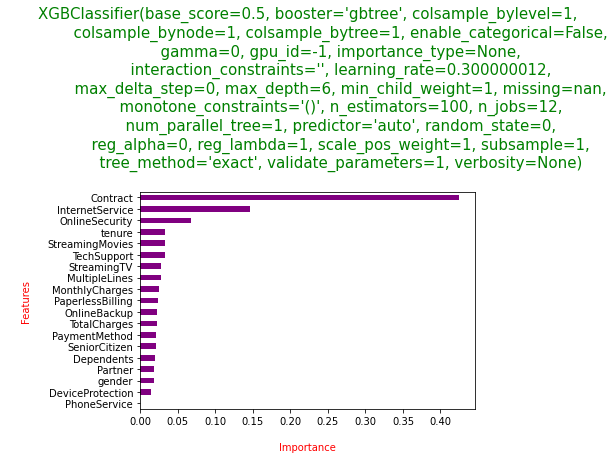

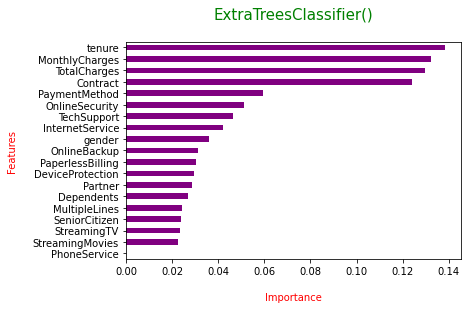

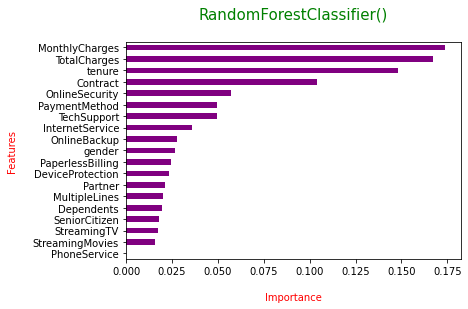

In [111]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

ensembles = [XGBClassifier,ExtraTreesClassifier,RandomForestClassifier]

rounding = np.vectorize(lambda x : round(x,4))

for ensem in ensembles:
    mdl=ensem()
    mdl.fit(x,y)
    mdl_feature = pd.Series(rounding(mdl.feature_importances_),index=x.columns).sort_values()
    mdl_feature.plot(kind='barh',color='purple')
    plt.xlabel('\nImportance',color='red')
    plt.ylabel('Features\n',color='red')
    plt.title(f'{mdl}\n',color='green',fontsize=15)
    plt.show()

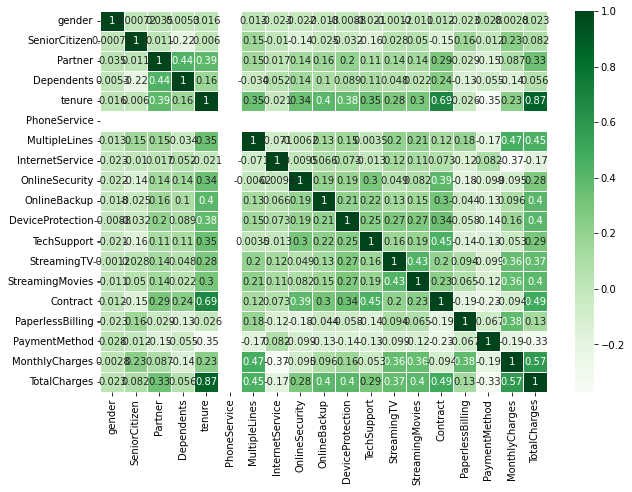

In [112]:
import seaborn as sns
plt.figure(figsize=(10, 7))  #width x height
p = sns.heatmap(x_train.corr(), annot=True, cmap='Greens', linewidths=.5)

In [113]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [114]:
percentage = 85
corr_features = correlation(x_train,percentage/100)
print(f"{percentage}% corr_features are\n{corr_features}\n")
print(f"So we can drop {len(set(corr_features))} corr_feature/s")

85% corr_features are
{'TotalCharges'}

So we can drop 1 corr_feature/s


In [115]:
x = dataset.drop(columns=["Churn",'PhoneService'])
y = dataset["Churn"]

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42,stratify=y)

In [117]:
from tensorflow.keras.layers import Dense ,Flatten

In [118]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras

In [119]:
import keras_tuner as kt

In [120]:
def build_model(hp):

  input = len(x.columns)

  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=(input,)))

  for i in range(hp.Int('num_layers',2,21)):
    model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=64,max_value=640,step=64),
                                activation=hp.Choice('act_' + str(i),['relu', 'tanh']))),
    keras.layers.Dropout(0.5),

  model.add(keras.layers.Dense(32, activation='sigmoid')),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1.0,1e-1,1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [121]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    #found: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
    max_trials=10,
    executions_per_trial=5,
    directory='project_01')

INFO:tensorflow:Reloading Oracle from existing project project_01\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from project_01\untitled_project\tuner0.json


In [143]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
tuner.search(x_train, y_train,
             epochs=200,
             validation_data=(x_test, y_test),
             use_multiprocessing=True,batch_size=1000000, verbose=True,workers=-1,callbacks=[stop_early]
             )

INFO:tensorflow:Oracle triggered exit


In [144]:
best_model = tuner.get_best_models()[0]

In [124]:
print('training accuracy')
best_model.evaluate(x_train,y_train)
print('test accuracy')
best_model.evaluate(x_test,y_test)

training accuracy
85/85 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7472
test accuracy
22/22 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7779


[0.5045101642608643, 0.7779411673545837]

In [125]:
stop_fun = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [126]:
history = best_model.fit(x_train, y_train, epochs=1000,use_multiprocessing=True,batch_size=1000000, verbose=True,workers=-1,validation_split=.2)

Epoch 1/1000
1/1 [==============================] - 1s 526ms/step - loss: 0.5433 - accuracy: 0.7295 - val_loss: 0.5137 - val_accuracy: 0.7555
Epoch 2/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.5524 - accuracy: 0.7254 - val_loss: 0.5121 - val_accuracy: 0.7537
Epoch 3/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.5446 - accuracy: 0.7318 - val_loss: 0.5110 - val_accuracy: 0.7555
Epoch 4/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5524 - accuracy: 0.7387 - val_loss: 0.5102 - val_accuracy: 0.7537
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5426 - accuracy: 0.7443 - val_loss: 0.5089 - val_accuracy: 0.7574
Epoch 6/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5475 - accuracy: 0.7295 - val_loss: 0.5075 - val_accuracy: 0.7555
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5325 - accuracy: 0.7466 - val_loss: 0.5065 - val_accuracy: 0.7555
Epoch 8/1000

In [127]:
best_model.evaluate(x_train,y_train)

85/85 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.9194


[0.38002312183380127, 0.9194260239601135]

In [128]:
best_model.evaluate(x_test,y_test)

22/22 [==============================] - 0s 2ms/step - loss: 1.6144 - accuracy: 0.7029


[1.614420771598816, 0.7029411792755127]

In [129]:
num = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
num

69

In [130]:
max(history.history['val_accuracy'])

0.7720588445663452

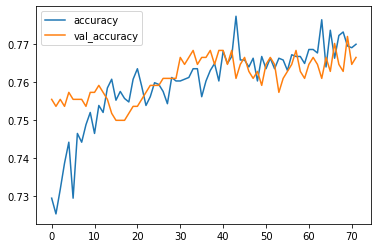

In [131]:
plt.plot(history.history['accuracy'][:num+3],label='accuracy')
plt.plot(history.history['val_accuracy'][:num+3],label='val_accuracy')
plt.legend()
plt.show()

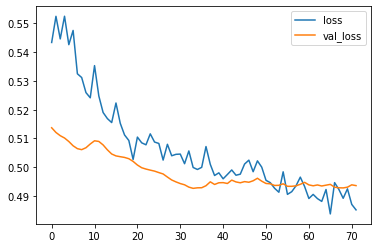

In [132]:
plt.plot(history.history['loss'][:num+3],label='loss')
plt.plot(history.history['val_loss'][:num+3],label='val_loss')
plt.legend()
plt.show()

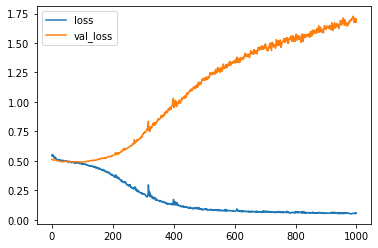

In [133]:
plt.plot(history.history['loss'][:],label='loss')
plt.plot(history.history['val_loss'][:],label='val_loss')
plt.legend()
plt.show()

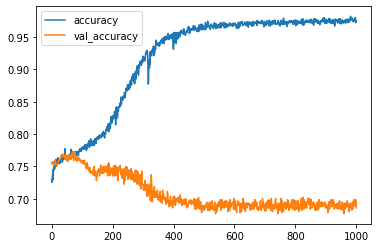

In [134]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [145]:
%%time
pred =best_model.predict(x_train)

CPU times: total: 188 ms
Wall time: 161 ms


In [146]:
y_pred=[]

for s in pred:
    if s>=.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

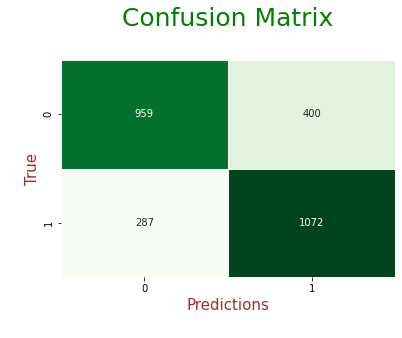

In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Greens",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [148]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      1359
         1.0       0.73      0.79      0.76      1359

    accuracy                           0.75      2718
   macro avg       0.75      0.75      0.75      2718
weighted avg       0.75      0.75      0.75      2718



In [149]:
%%time
predictions =best_model.predict(x_test)

CPU times: total: 62.5 ms
Wall time: 62.2 ms


In [150]:
y_predictions=[]

for k in predictions:
    if k>=.5 :
        y_predictions.append(1)
    else:
        y_predictions.append(0)

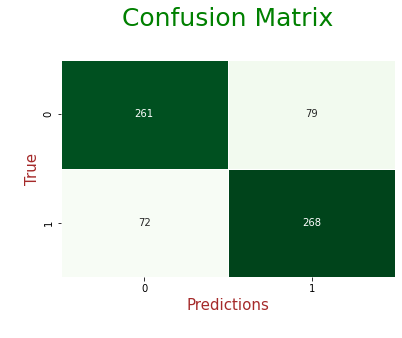

In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_predictions))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Greens",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [152]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       340
         1.0       0.77      0.79      0.78       340

    accuracy                           0.78       680
   macro avg       0.78      0.78      0.78       680
weighted avg       0.78      0.78      0.78       680

